In [16]:
import networkx as nx

In [17]:
map = "XXXXXXXXXXXX\nX...X..X..eX\nX.X....X.XXX\nX..X.X.X.X.X\nXX.XXX.X...X\nX........X.X\nXsXX...X...X\nXXXXXXXXXXXX"

print(map)

XXXXXXXXXXXX
X...X..X..eX
X.X....X.XXX
X..X.X.X.X.X
XX.XXX.X...X
X........X.X
XsXX...X...X
XXXXXXXXXXXX


In [18]:
map_split = map.split("\n")
print(map_split)

['XXXXXXXXXXXX', 'X...X..X..eX', 'X.X....X.XXX', 'X..X.X.X.X.X', 'XX.XXX.X...X', 'X........X.X', 'XsXX...X...X', 'XXXXXXXXXXXX']


In [19]:
# graph object, stores metadata for graph and methods to manipulate graph
class MazeGraph(nx.Graph):
    def __init__(self):
        super().__init__()

    def addNode(self, node):
        self.add_node(node)
        
    def addEdge(self, node1, node2):
        self.add_edge(node1, node2)

In [20]:
# Create an empty graph
maze_graph = MazeGraph()

In [21]:
map_split[1][10]

'e'

In [22]:
# Add the nodes (cells) to the graph
for y in range(len(map_split)): # go from bottom up
    for x in range(len(map_split[0])):
        if map_split[y][x] != 'X': #1 is used to represent walls
            
            # reverse y axis order before adding node
            y_reverse = len(map_split) - 1 - y

            maze_graph.addNode((x, y_reverse))
            
            # get starting node
            if map_split[y][x] == 's':
                start_node = (x, y_reverse)

            # get ending node
            if map_split[y][x] == 'e':
                end_node = (x, y_reverse)

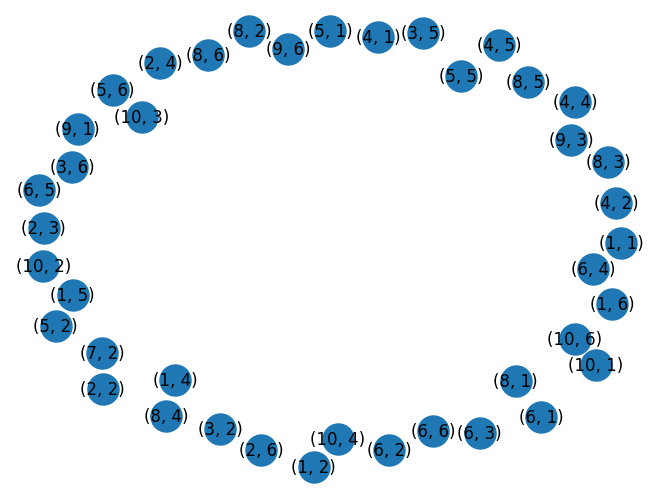

In [23]:
nx.draw(maze_graph, pos=nx.spring_layout(maze_graph), with_labels=True, node_size=500)

In [24]:
# Add the edges (connections) to the graph
for node in maze_graph.nodes:
    x, y = node

    # Check the top cell (y + 1)
    if (x, y + 1) in maze_graph.nodes:
        maze_graph.addEdge(node, (x, y + 1))

    # Check the bottom cell (y - 1)
    if (x, y - 1) in maze_graph.nodes:
        maze_graph.addEdge(node, (x, y - 1))

    # Check the left cell (x - 1)
    if (x - 1, y) in maze_graph.nodes:
        maze_graph.addEdge(node, (x - 1, y))

    # Check the right cell (x + 1)
    if (x + 1, y) in maze_graph.nodes:
        maze_graph.addEdge(node, (x + 1, y))

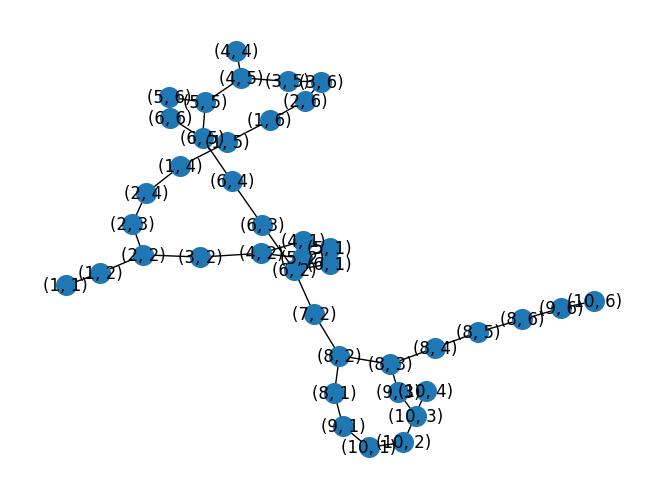

In [25]:
nx.draw(maze_graph, pos=nx.spring_layout(maze_graph), with_labels=True, node_size=200)

In [26]:
(1, 10) in maze_graph

False

In [27]:
print(start_node, end_node)

(1, 1) (10, 6)


In [28]:
def go_north(current_node):
    return (current_node[0], current_node[1] + 1)

def go_east(current_node):
    return (current_node[0] + 1, current_node[1])

def go_south(current_node):
    return (current_node[0], current_node[1] - 1)

def go_west(current_node):
    return (current_node[0] - 1, current_node[1])

In [29]:
### for the left hand algorithm, orientation matters, so we need to keep track of it as we move through the maze

def left_hand_algo(graph, start_pos, end_pos):
    x, y = start_pos

    # array to store steps
    coordinate_steps = []

    # keep track of orientation
    north = 90
    east = 0
    south = 270
    west = 180
    direction = ["N", "E", "S", "W"]

    direction_index = 0
    current_orientation = direction[direction_index]
    
    while (x, y) != end_pos:
        print(current_orientation)
        print(x, y)
        ### call different functions based on orientation
        # check if can go left
        if current_orientation == "N":
            next_node = go_west((x, y))
            new_orientation = west

        elif current_orientation == "E":
            next_node = go_north((x, y))
            new_orientation = north

        elif current_orientation == "S":
            next_node = go_east((x, y))
            new_orientation = east

        else:
            next_node = go_south((x, y))
            new_orientation = south

        if next_node in graph:
            x, y = next_node
            coordinate_steps.append(new_orientation)
            coordinate_steps.append((x, y))
            direction_index -=1
            current_orientation = direction[direction_index]
            continue

        # check if can go forward   
        if current_orientation == "N":
            next_node = go_north((x, y))

        elif current_orientation == "E":
            next_node = go_east((x, y))

        elif current_orientation == "S":
            next_node = go_south((x, y))

        else:
            next_node = go_west((x, y))

        if next_node in graph:
            x, y = next_node
            coordinate_steps.append((x, y))
            continue

        # check if can go right
        if current_orientation == "N":
            next_node = go_east((x, y))
            new_orientation = east
        
        elif current_orientation == "E":
            next_node = go_south((x, y))
            new_orientation = south

        elif current_orientation == "S":
            next_node = go_west((x, y))
            new_orientation = west

        else:
            next_node = go_north((x, y))
            new_orientation = north

        if next_node in graph:
            x, y = next_node
            coordinate_steps.append(new_orientation)
            coordinate_steps.append((x, y))
            direction_index += 1
            current_orientation = direction[direction_index]
            continue

        # if all fails, go opposite direction
        if current_orientation == "N":
            next_node = go_south((x, y))
            new_orientation = south

        elif current_orientation == "E":
            next_node = go_west((x, y))
            new_orientation = west
        
        elif current_orientation == "S":
            next_node = go_north((x, y))
            new_orientation = north

        else:
            next_node = go_east((x, y))
            new_orientation = east
    
        x, y = next_node
        coordinate_steps.append(new_orientation)
        coordinate_steps.append((x, y))
        direction_index += 2
        current_orientation = direction[direction_index]

    return coordinate_steps

In [30]:
left_hand_algo(maze_graph, start_node, end_node)

N
1 1
N
1 2
E
2 2
N
2 3
N
2 4
W
1 4
N
1 5
N
1 6
E
2 6
E
3 6
S
3 5
E
4 5
E
5 5
N
5 6
E
6 6
S
6 5
S
6 4
S
6 3
S
6 2
E
7 2
E
8 2
N
8 3
N
8 4
N
8 5
N
8 6
E
9 6


[(1, 2),
 0,
 (2, 2),
 90,
 (2, 3),
 (2, 4),
 180,
 (1, 4),
 90,
 (1, 5),
 (1, 6),
 0,
 (2, 6),
 (3, 6),
 270,
 (3, 5),
 0,
 (4, 5),
 (5, 5),
 90,
 (5, 6),
 0,
 (6, 6),
 270,
 (6, 5),
 (6, 4),
 (6, 3),
 (6, 2),
 0,
 (7, 2),
 (8, 2),
 90,
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 0,
 (9, 6),
 (10, 6)]